In [7]:
import yfinance as yf

# EUR/USD
data = yf.download("EURUSD=X", start="2000-05-01", end="2025-05-01")


[*********************100%***********************]  1 of 1 completed


In [8]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
Date,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0
2003-12-02,1.208897,1.210903,1.194600,1.196101,0
2003-12-03,1.212298,1.213003,1.207700,1.209000,0
2003-12-04,1.208094,1.214403,1.204398,1.212004,0
2003-12-05,1.218695,1.219096,1.206593,1.207802,0


In [9]:
data = data.reset_index()
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
0,2003-12-01,1.196501,1.204007,1.194401,1.203398,0
1,2003-12-02,1.208897,1.210903,1.194600,1.196101,0
2,2003-12-03,1.212298,1.213003,1.207700,1.209000,0
3,2003-12-04,1.208094,1.214403,1.204398,1.212004,0
4,2003-12-05,1.218695,1.219096,1.206593,1.207802,0


In [11]:
# Rename columns to remove the ticker information
data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


In [12]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2003-12-01,1.196501,1.204007,1.194401,1.203398,0
1,2003-12-02,1.208897,1.210903,1.194600,1.196101,0
2,2003-12-03,1.212298,1.213003,1.207700,1.209000,0
3,2003-12-04,1.208094,1.214403,1.204398,1.212004,0
4,2003-12-05,1.218695,1.219096,1.206593,1.207802,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5556 non-null   datetime64[ns]
 1   Close   5556 non-null   float64       
 2   High    5556 non-null   float64       
 3   Low     5556 non-null   float64       
 4   Open    5556 non-null   float64       
 5   Volume  5556 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 260.6 KB


In [13]:
data.describe()

,Date,Close,High,Low,Open,Volume
count,5556,5556.000000,5556.000000,5556.000000,5556.000000,5556.0
mean,2014-08-22 13:49:53.520518400,1.226942,1.231446,1.222007,1.226919,0.0
min,2003-12-01 00:00:00,0.959619,0.967006,0.072902,0.959619,0.0
25%,2009-04-29 18:00:00,1.115387,1.119045,1.112072,1.115424,0.0
50%,2014-08-28 12:00:00,1.212665,1.217002,1.207788,1.212496,0.0
75%,2019-12-30 06:00:00,1.323224,1.328745,1.317955,1.322957,0.0
max,2025-04-30 00:00:00,1.598798,1.602821,1.587402,1.598184,0.0
std,NaN,0.128718,0.129498,0.128902,0.128722,0.0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Closing Price')

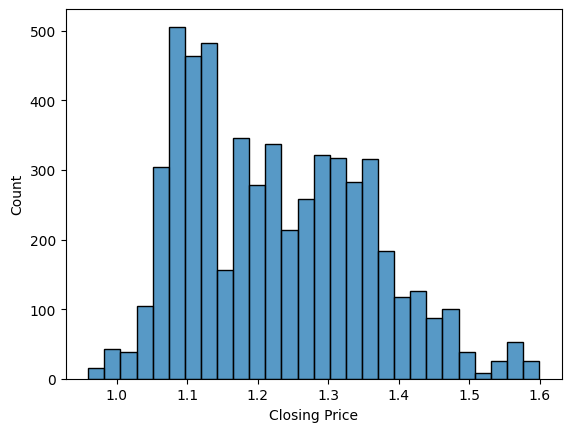

In [21]:
sns.histplot(data['Close'])
plt.xlabel("Closing Price")

In [22]:
# Remove the unncessary feature
data = data.drop(columns = ["Volume"])

In [23]:
data.head()

,Date,Close,High,Low,Open
0,2003-12-01,1.196501,1.204007,1.194401,1.203398
1,2003-12-02,1.208897,1.210903,1.194600,1.196101
2,2003-12-03,1.212298,1.213003,1.207700,1.209000
3,2003-12-04,1.208094,1.214403,1.204398,1.212004
4,2003-12-05,1.218695,1.219096,1.206593,1.207802


[]

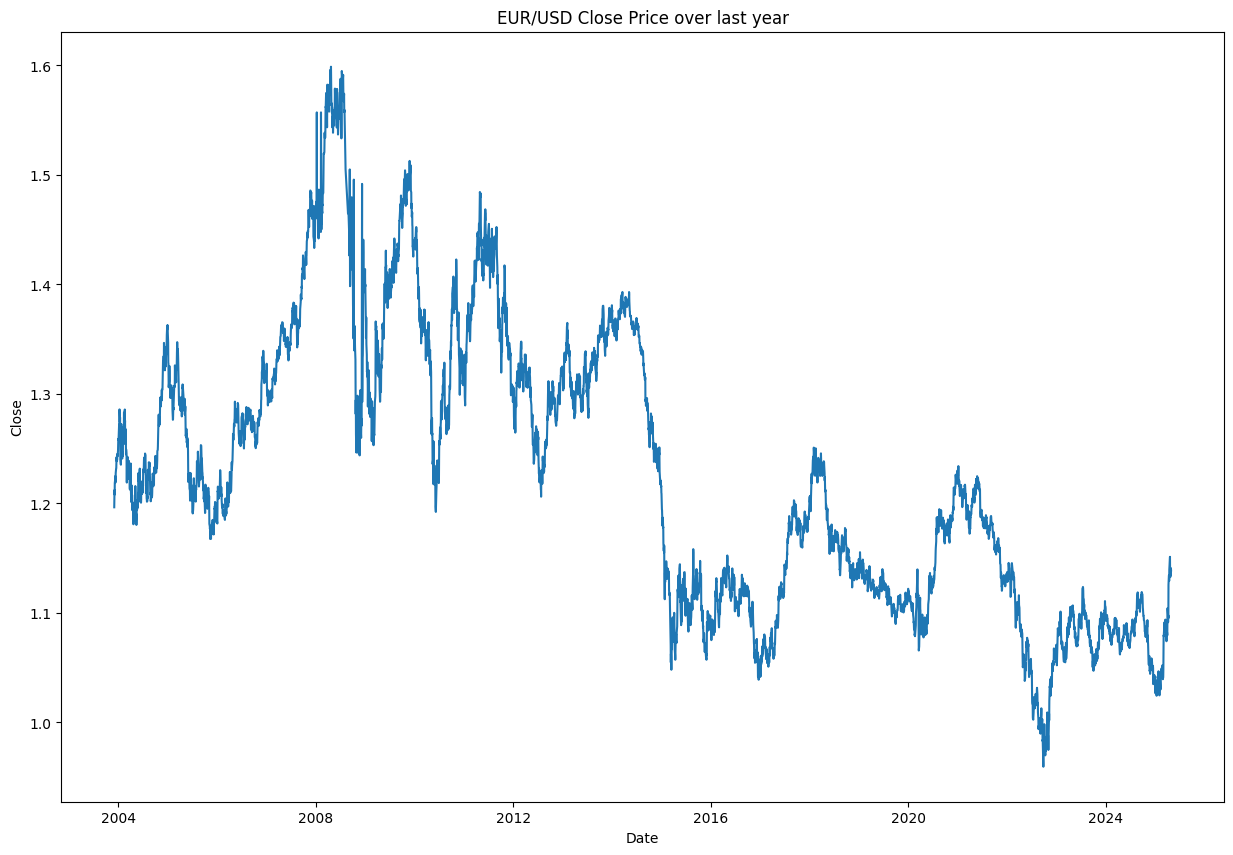

In [24]:
plt.figure(figsize=(15, 10))
sns.lineplot(x = "Date", y = "Close", data = data)
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("EUR/USD Close Price over last year")
plt.plot()

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [38]:
#Split the data into dependent and independent features
X = data.drop(columns = ["Close", "Date"])
y = data["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape

(4444, 3)

In [40]:
X_test.shape

(1112, 3)

In [41]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred

array([1.20386762, 1.16056583, 1.26387713, ..., 1.17870901, 1.23762326,
       1.14776603])

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.1908946772887574e-05
R-squared: 0.9981065837724024
